In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR = '../'
import sys
sys.path.append(BASE_DIR)

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

import torch

from common import stream_dataloader

In [4]:
SATELLITE_ZARR_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)


<xarray.Dataset>
Dimensions:  (time: 173624, y: 891, x: 1843)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
    x_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
  * y        (y) float32 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(22, 891, 1843), meta=np.ndarray>


In [8]:
BATCH_SIZE = 32
ds = stream_dataloader.ClimatehackStreamLoader(dataset, random_state=7, crops_per_slice=5)
ch_dataloader = torch.utils.data.DataLoader(ds, batch_size=BATCH_SIZE)

In [9]:
ch_iter = iter(ch_dataloader)

In [10]:
input_data, target_output = next(ch_iter)

In [11]:
input_data.shape

torch.Size([32, 12, 128, 128])

In [12]:
target_output.shape

torch.Size([32, 24, 64, 64])

In [18]:
csl_iter = iter(csl)
input_data, target_output = next(csl_iter)

In [26]:
input_data.shape, target_output.shape

((12, 128, 128), (24, 64, 64))

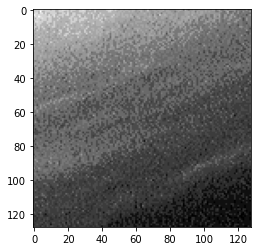

In [31]:
plt.imshow(input_data[0], cmap='gray')

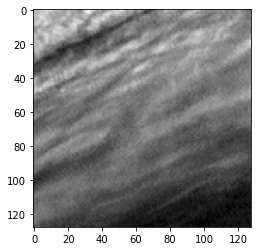

In [34]:
plt.imshow(input_data[11], cmap='gray')

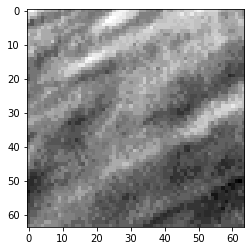

In [33]:
plt.imshow(target_output[0], cmap='gray')

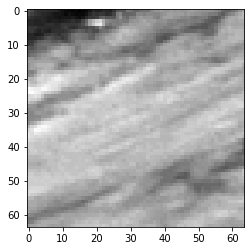

In [35]:
plt.imshow(target_output[23], cmap='gray')